In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [4]:
data = pd.read_csv('Book1.csv')
print (data.head(10))
print ('\n Data Types:')
print (data.dtypes)

           ds       y
0  1992-01-01  146376
1  1992-02-01  147079
2  1992-03-01  159336
3  1992-04-01  163669
4  1992-05-01  170068
5  1992-06-01  168663
6  1992-07-01  169890
7  1992-08-01  170364
8  1992-09-01  164617
9  1992-10-01  173655

 Data Types:
ds    object
y      int64
dtype: object


In [9]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')


In [10]:
dateparse

<function __main__.<lambda>(dates)>

In [11]:
data = pd.read_csv('Book1.csv', parse_dates=['ds'], index_col='ds',date_parser=dateparse)
print (data.head())

                 y
ds                
1992-01-01  146376
1992-02-01  147079
1992-03-01  159336
1992-04-01  163669
1992-05-01  170068


In [12]:
data.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01',
               '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01',
               '2016-04-01', '2016-05-01'],
              dtype='datetime64[ns]', name='ds', length=293, freq=None)

In [14]:
ts = data['y'] 
ts.head(10)

ds
1992-01-01    146376
1992-02-01    147079
1992-03-01    159336
1992-04-01    163669
1992-05-01    170068
1992-06-01    168663
1992-07-01    169890
1992-08-01    170364
1992-09-01    164617
1992-10-01    173655
Name: y, dtype: int64

In [15]:
#1. Specific the index as a string constant:
ts['1992-01-01']

146376

In [17]:


#2. Import the datetime library and use 'datetime' function:
from datetime import datetime
ts[datetime(1992,1,1)]

146376

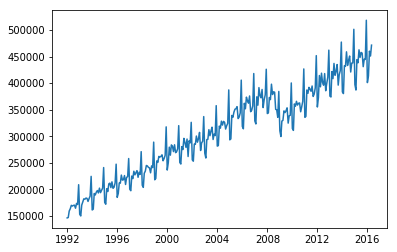

In [18]:
plt.plot(ts)

In [25]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = timeseries.rolling(12).mean()
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = timeseries.rolling(12).std()



    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

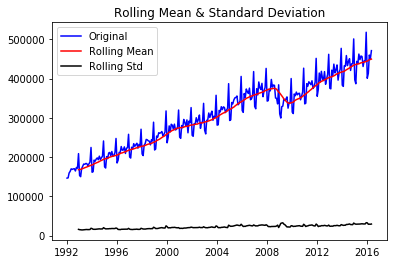

Results of Dickey-Fuller Test:
Test Statistic                  -0.644325
p-value                          0.860649
#Lags Used                      15.000000
Number of Observations Used    277.000000
Critical Value (1%)             -3.454180
Critical Value (5%)             -2.872031
Critical Value (10%)            -2.572360
dtype: float64


In [26]:
test_stationarity(ts)

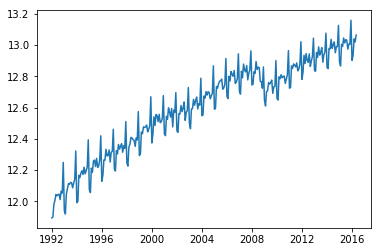

In [27]:
ts_log = np.log(ts)
plt.plot(ts_log)

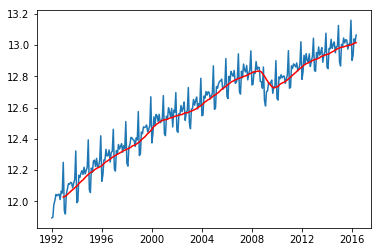

In [28]:

moving_avg = ts_log.rolling(12).mean()


plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [30]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(20)

ds
1992-01-01         NaN
1992-02-01         NaN
1992-03-01         NaN
1992-04-01         NaN
1992-05-01         NaN
1992-06-01         NaN
1992-07-01         NaN
1992-08-01         NaN
1992-09-01         NaN
1992-10-01         NaN
1992-11-01         NaN
1992-12-01    0.222367
1993-01-01   -0.091120
1993-02-01   -0.113473
1993-03-01    0.008076
1993-04-01    0.036501
1993-05-01    0.062948
1993-06-01    0.052993
1993-07-01    0.058246
1993-08-01    0.050155
Name: y, dtype: float64

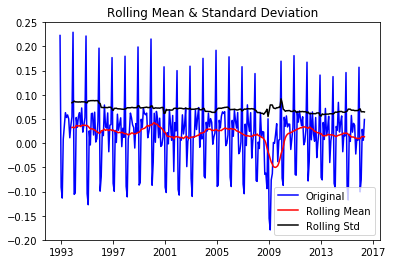

Results of Dickey-Fuller Test:
Test Statistic                  -3.988708
p-value                          0.001471
#Lags Used                      15.000000
Number of Observations Used    266.000000
Critical Value (1%)             -3.455175
Critical Value (5%)             -2.872468
Critical Value (10%)            -2.572593
dtype: float64


In [31]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

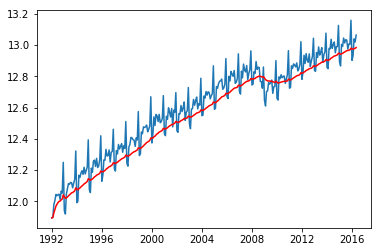

In [35]:
#expwighted_avg = pd.ewm(ts_log, halflife=12)
expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

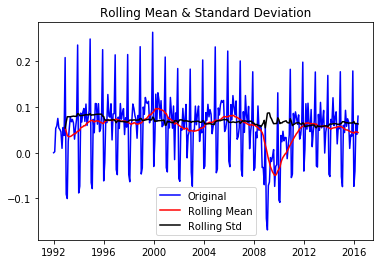

Results of Dickey-Fuller Test:
Test Statistic                  -3.306374
p-value                          0.014596
#Lags Used                      15.000000
Number of Observations Used    277.000000
Critical Value (1%)             -3.454180
Critical Value (5%)             -2.872031
Critical Value (10%)            -2.572360
dtype: float64


In [36]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

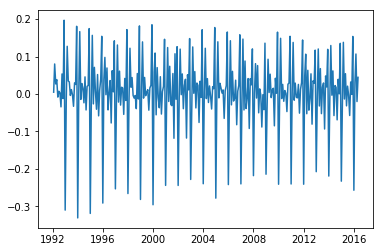

In [37]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

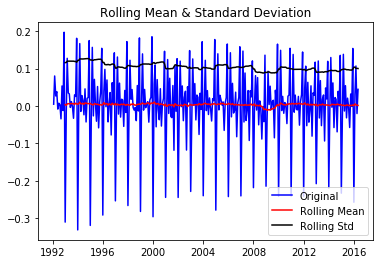

Results of Dickey-Fuller Test:
Test Statistic                  -3.124095
p-value                          0.024821
#Lags Used                      14.000000
Number of Observations Used    277.000000
Critical Value (1%)             -3.454180
Critical Value (5%)             -2.872031
Critical Value (10%)            -2.572360
dtype: float64


In [38]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

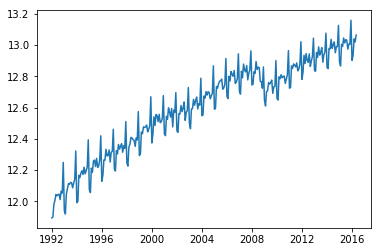

In [39]:
plt.plot(ts_log)

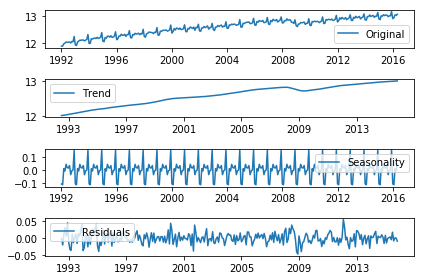

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

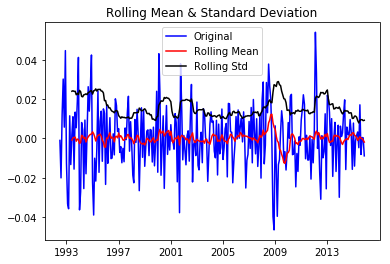

Results of Dickey-Fuller Test:
Test Statistic                  -5.595890
p-value                          0.000001
#Lags Used                      14.000000
Number of Observations Used    266.000000
Critical Value (1%)             -3.455175
Critical Value (5%)             -2.872468
Critical Value (10%)            -2.572593
dtype: float64


In [41]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [42]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf


Text(0.5,1,'Autocorrelation Function')

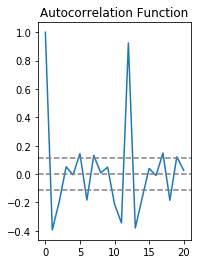

In [43]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

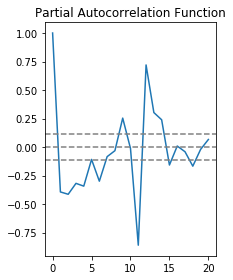

In [44]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [45]:
from statsmodels.tsa.arima_model import ARIMA


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 2.0320')

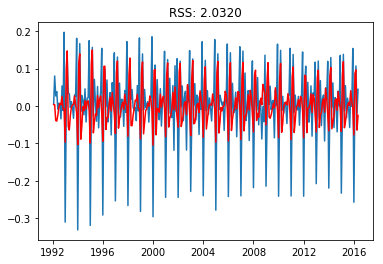

In [46]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 1.6378')

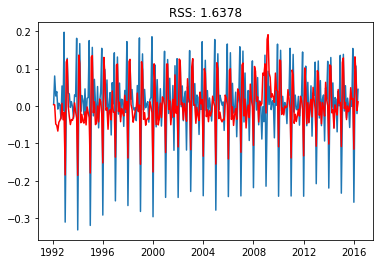

In [47]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 1.4908')

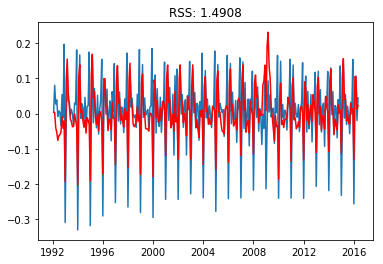

In [48]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [53]:
results_ARIMA.fittedvalues.head()

ds
1992-02-01    0.003611
1992-03-01    0.003114
1992-04-01   -0.040523
1992-05-01   -0.053312
1992-06-01   -0.076392
dtype: float64

In [54]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

ds
1992-02-01    0.003611
1992-03-01    0.003114
1992-04-01   -0.040523
1992-05-01   -0.053312
1992-06-01   -0.076392
dtype: float64


In [56]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

ds
1992-02-01    0.003611
1992-03-01    0.006725
1992-04-01   -0.033798
1992-05-01   -0.087111
1992-06-01   -0.163503
dtype: float64


In [69]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


ds
1992-01-01    11.893934
1992-02-01    11.893934
1992-03-01    11.893934
1992-04-01    11.893934
1992-05-01    11.893934
dtype: float64

In [70]:

predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)


In [71]:
predictions_ARIMA_log.head()

ds
1992-01-01    11.893934
1992-02-01    11.897545
1992-03-01    11.900659
1992-04-01    11.860136
1992-05-01    11.806823
dtype: float64

In [72]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
predictions_ARIMA.head()

ds
1992-01-01    146376.000000
1992-02-01    146905.534426
1992-03-01    147363.668336
1992-04-01    141511.398666
1992-05-01    134164.675540
dtype: float64

Text(0.5,1,'RMSE: 170387.5712')

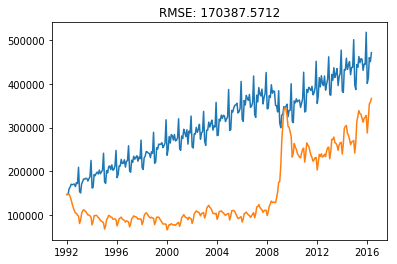

In [73]:
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))